# Salary Prediction EDA

# Defining Problem
Salary is important for job seekers, it's also crucial for employeer to offer a competetive salary for the right candidate. Generally, salary depends on various factor, such as jobtitle, degree, years of experiences, type of company and major. In this project, we will predict the salary based on the job descriptions.

# Basic data analysis tools

In [33]:
# basic data analysis tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
# Personal Information
__author__ = "Emrul Hasan"
__email__ = "emrul.phy@gmail.com"

Load available datasets

In [34]:
#load all the datasets available into Pandas dataframe
train_data=pd.read_csv('train_features.csv')
test_data=pd.read_csv('test_features.csv')
salary_data=pd.read_csv('train_salaries.csv')

Examine the data

There are total of three datasets. They are train data, test data and salary or the target data. In this notebook, for exploratory data analysis, we will be playing with train and target data. 

In [35]:
# Read first 5 columns of training data
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


# Basic Information

In [4]:
# Function to print basic information about the data

def data_info(df):
    

    print('Shape of the data: ', df.shape)
    
    print('------------########################------------------')
    print('                                                     ')
    print('Information of the data:')
    print(' ', df.info())
    
    print('------------########################------------------')
    print('                                                     ')
    print('Check the duplication of the data:', df.duplicated().sum())
    
    print('------------########################------------------')
    print('                                                     ')
    print('\nCheck the missing value of the data:\n', df.isnull().sum())


In [5]:
# Print the informantion of the training dataset
data_info(train_data)

Shape of the data:  (1000000, 8)
------------########################------------------
                                                     
Information of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
  None
------------########################------------------
                                                     
Check the duplication of the data: 0
------------########################------------------
                                                     

Check the missing value of the dat

In [6]:
# Informantion of the target data
data_info(salary_data)

Shape of the data:  (1000000, 2)
------------########################------------------
                                                     
Information of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
  None
------------########################------------------
                                                     
Check the duplication of the data: 0
------------########################------------------
                                                     

Check the missing value of the data:
 jobId     0
salary    0
dtype: int64


# Observation

There are total of 10000 entry and 8 columns. Six of them are categorical data and rest of the two are numerical data and our target column is also a numerical column.

# Statistical Summary 

In [7]:
# Function for Statistical susmmary 
def summary(df):
    print('\n Statistical Summary of Numberical data:\n', df.describe(include=np.number))
    print('------------########################------------------')
    print('\n Statistical Summary of categorical data:\n',df.describe(include='O'))

In [8]:
# Summary of the training data
summary(train_data)


 Statistical Summary of Numberical data:
        yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         11.992386            49.529260
std           7.212391            28.877733
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000
------------########################------------------

 Statistical Summary of categorical data:
                    jobId companyId  jobType       degree    major industry
count            1000000   1000000  1000000      1000000  1000000  1000000
unique           1000000        63        8            5        9        7
top     JOB1362685163667    COMP39   SENIOR  HIGH_SCHOOL     NONE      WEB
freq                   1     16193   125886       236976   532355   143206


In [9]:
# Function to visualize the target variable
def plot_target(df):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.title('Boxplot')
    sns.boxplot(df.salary)

    plt.subplot(1,2,2)
    plt.title('Distribution Plot')
    sns.distplot(df.salary, bins=20)
    plt.show()

C:\Users\T420\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


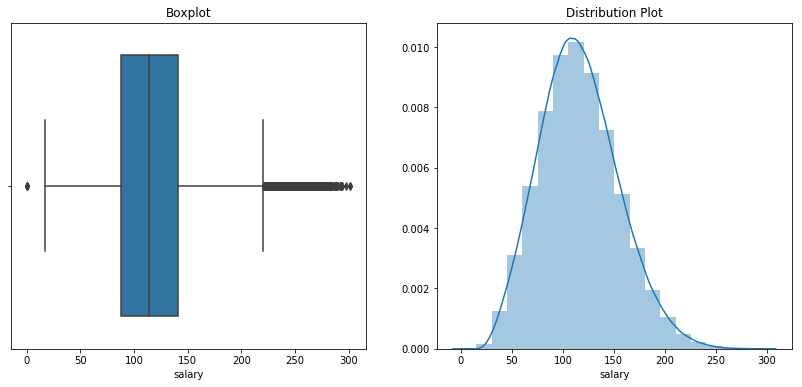

In [10]:
plot_target(salary_data)

It is clear that there are outliers in the target column(left panel). Furhter analysis would guide us how to tackle these outliers. There can be many reasons for outliers. It can be incorrectly reported or some unsual data. Right box plot shows that the data is normally distributed.

Let's Merge the salary data with the training data that would help us to see the depending of input feature with target variable.

In [11]:
# Adding the target column with the training dataset
def full_data(df1,df2,key=None ):
    return pd.merge(df1, df2,on=key)

train=full_data(train_data, salary_data,key='jobId')

# Outliers Check

In [12]:
# Function to check outliers
def outlier(df):
    stat=df.describe()
    IQR=stat['75%']-stat['25%']
    upper=stat['75%']+1.5*IQR
    lower=stat['25%']-1.5*IQR
    print('The upper and lower bounds for outliers are {} and {}'.format(upper,lower))

In [13]:
outlier(train.salary)

The upper and lower bounds for outliers are 220.5 and 8.5


In [14]:
# salry is equal to zero
train[train['salary']==0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


No one can have zero salary. We can just simply drop the data with zero salary. Check the upper and lower bound of the outliers.

In [15]:
outliers_low=train[train.salary<8.5]
outliers_up=train[train.salary>220.5]

In [16]:
# Outliers below the first quartiles
outliers_low

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [17]:
# outliers below the upper bound
outliers_up

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
966,JOB1362684408653,COMP32,CEO,DOCTORAL,ENGINEERING,FINANCE,23,11,247
986,JOB1362684408673,COMP37,CFO,HIGH_SCHOOL,NONE,FINANCE,24,20,229
1211,JOB1362684408898,COMP24,CTO,DOCTORAL,BUSINESS,FINANCE,5,46,232
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
1413,JOB1362684409100,COMP56,VICE_PRESIDENT,MASTERS,MATH,WEB,24,15,241


We need further analysis to check if they are really outliers or not. If we take a close look at the data it is found that junior position is also paid above that outlier.

In [18]:
# check the potential suspicious outliers above the upper bound
train[(train.salary>220.5) & (train.jobType=='JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


From outliers above the third quartile, it is seen that they are legitimate because majority of the position  are C-level. Employees with advanced degree and years of experience are well paid. So it seems the data are realistic

In [19]:
# Remove the outliers below 8.5
train=train[train.salary>8.5]

In [20]:
# Groupby based on industry
train.groupby('industry')['salary'].mean().sort_values()

industry
EDUCATION     99.448386
SERVICE      104.446820
AUTO         109.435222
HEALTH       115.735540
WEB          121.645362
FINANCE      130.747659
OIL          130.953863
Name: salary, dtype: float64

Highly paid industries are OIL and FINANCE and lowest paid is Education

In [21]:
# All Colmuns
train.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

JobId and companyId columns have no contribution to the target. So we will drop them

In [22]:
# Categorical Columns
cat_col=['jobType', 'degree', 'major', 'industry']
# Numerical Columns
num_col=['yearsExperience', 'milesFromMetropolis']

In [23]:
# Function to plot salary vs categorical plot
def cat_plot(df):
    for col in cat_col:
        f, ax = plt.subplots(figsize=(12, 6))
        sns.boxplot(x=col,y='salary', data=df)
        plt.xlabel(col)
        plt.title('{}'.format(col))

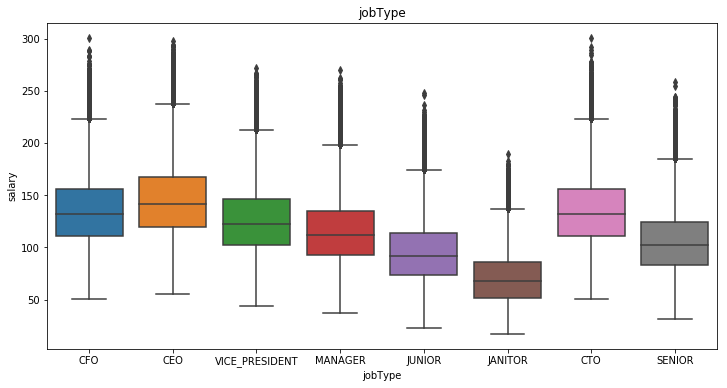

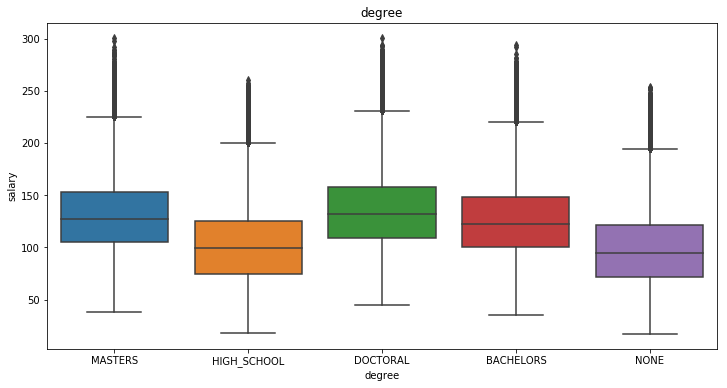

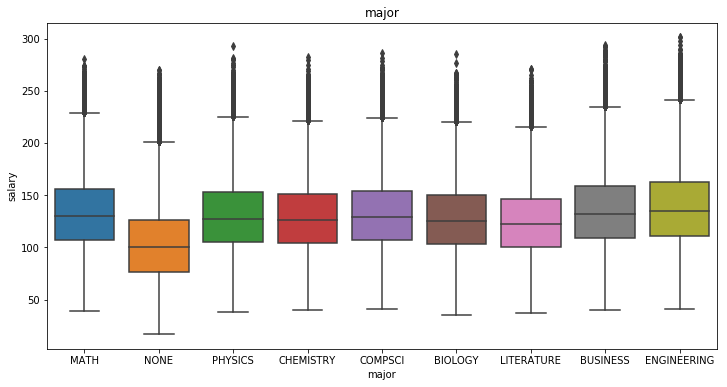

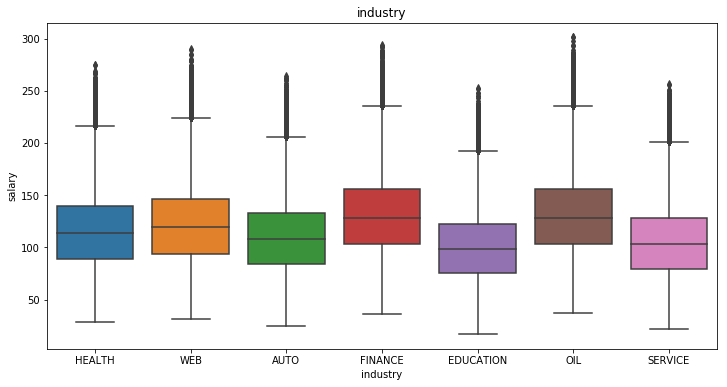

In [24]:
cat_plot(train)

From the degree plots, it is seen that salary increase with higher degree. Having doctoral and master degree are higly paid. Similarly, Oil and Finance industry pay more compare to others.

In [25]:
# Function to plot salary vs categorical plot
def numerical_plot(df):
    for col in num_col:
        f, ax = plt.subplots(figsize=(10, 6))
        mean = df.groupby(col)['salary'].mean()
        mean.plot()
        plt.xlabel(col)
        plt.ylabel('Salary')
        plt.title('{} vs {}'.format('Salary',col))

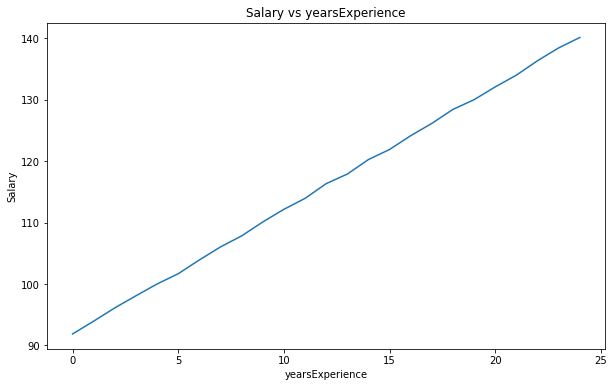

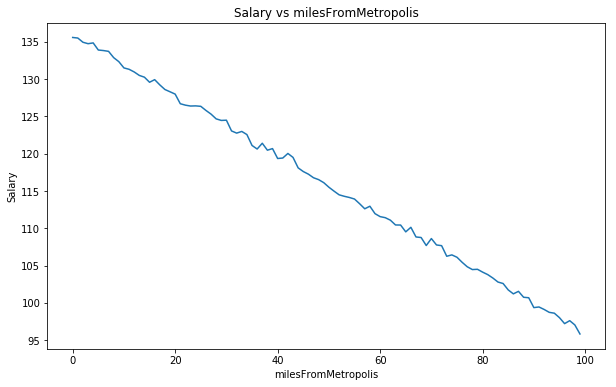

In [26]:
numerical_plot(train)

It is obvious that yearsofExperience is strongly positively correlated with salary whereas milesFromMetropolis is negatively correlated.

# Converting categorical data to numerical data

Before converting the data let's remove the jobId and companyId columns becuase they do not have any contribution to predictions.

In [27]:
df_train=train.drop(columns=['jobId','companyId'])

In [28]:
# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
for col in cat_col:
    df_train[col]=le.fit_transform(df_train[col])

In [30]:
df_train.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,1,3,6,3,10,83,130
1,0,2,7,6,3,73,101
2,7,1,8,3,10,38,137
3,5,1,2,0,8,17,142
4,7,0,8,2,8,16,163


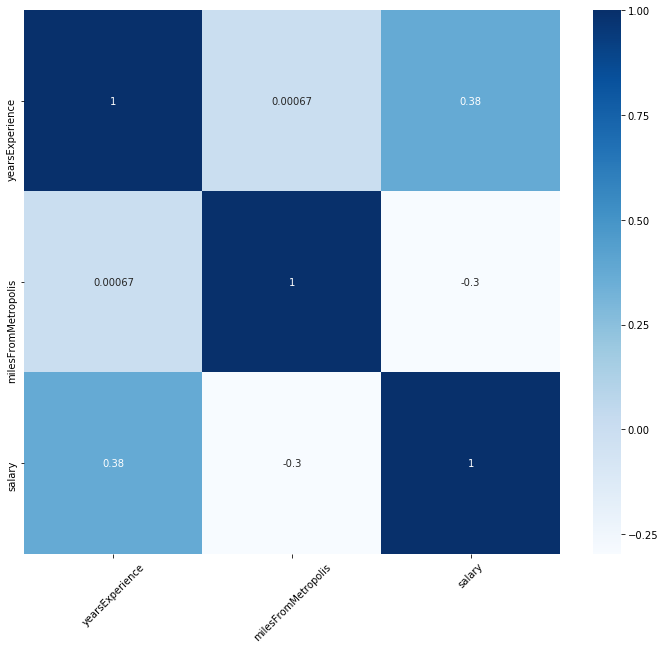

In [31]:
# Heatmap plot for numerical data
fig = plt.figure(figsize=(12, 10))
#features = ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(df_train[num_col + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

The correlation plot confirms that yearsofExperience has positive correlation with salary whereas milesFrom Metropolis has negative correlation with salaries